In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("automobileinsuranceclaim.csv",parse_dates=["Effective To Date"])

In [3]:
df.head(10)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,2011-01-25,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2011-02-24,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,2011-01-18,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,2011-01-26,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2011-02-17,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


In [4]:
df.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [5]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
df.dtypes

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

In [7]:
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

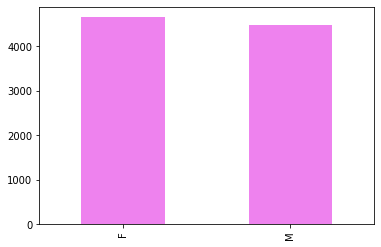

In [8]:
df['Gender'].value_counts().plot.bar(color="violet")

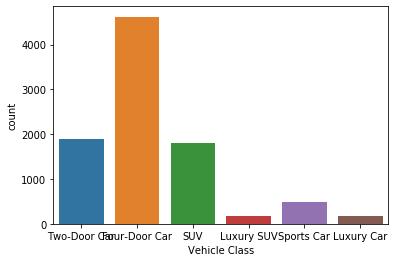

In [9]:
sns.countplot(df['Vehicle Class'])

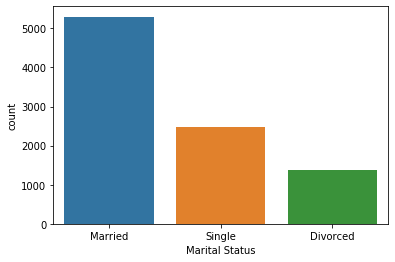

In [10]:
sns.countplot(df['Marital Status'])

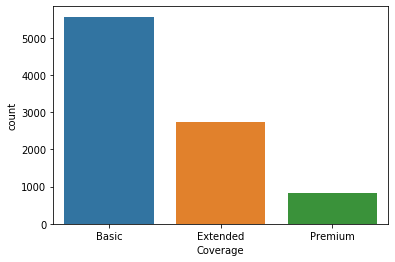

In [11]:
sns.countplot(df['Coverage'])

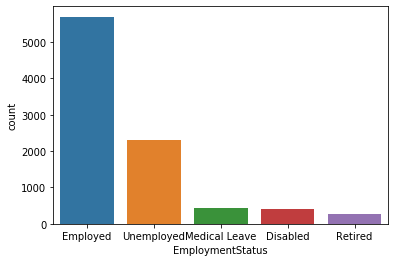

In [12]:
sns.countplot(df['EmploymentStatus'])

In [13]:
df_dates=pd.DataFrame()
df_dates["day"]=df["Effective To Date"].dt.day_name()
df_dates["year"]=df["Effective To Date"].dt.year
df_dates["month"]=df["Effective To Date"].dt.month_name()
df_dates["Total Claim Amount"]=df["Total Claim Amount"]

In [14]:
df_dates["type_of_day"]=np.where((df_dates["day"]=="Sunday")|(df_dates["day"]=="Saturday"),"weekend","weekday")

In [15]:
df_dates

,day,year,month,Total Claim Amount,type_of_day
0,Thursday,2011,February,384.811147,weekday
1,Monday,2011,January,1131.464935,weekday
2,Saturday,2011,February,566.472247,weekend
3,Thursday,2011,January,529.881344,weekday
4,Thursday,2011,February,138.130879,weekday
...,...,...,...,...,...
9129,Thursday,2011,February,198.234764,weekday
9130,Saturday,2011,February,379.200000,weekend
9131,Sunday,2011,February,790.784983,weekend
9132,Thursday,2011,February,691.200000,weekday


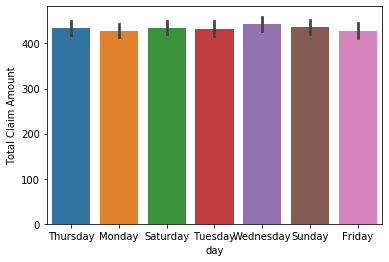

In [16]:
sns.barplot(x="day",y="Total Claim Amount",data=df_dates)
plt.show()

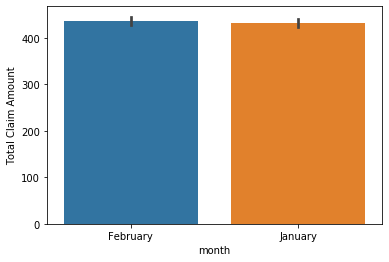

In [17]:
sns.barplot(x="month",y="Total Claim Amount",data=df_dates)
plt.show()

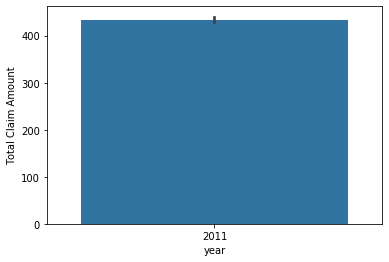

In [18]:
sns.barplot(x="year",y="Total Claim Amount",data=df_dates)
plt.show()

Text(0.5, 1.0, 'vehicle class vs total claim amount')

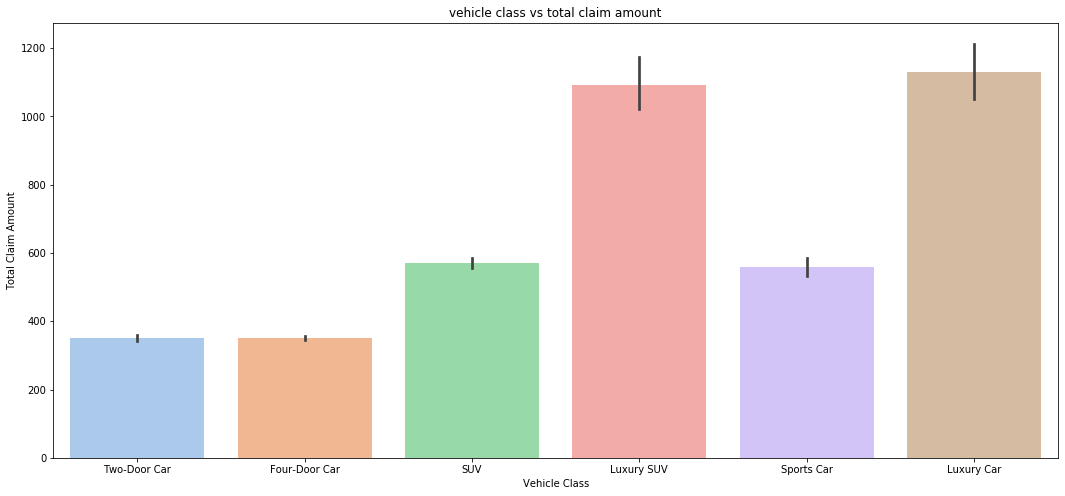

In [19]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Vehicle Class', y = 'Total Claim Amount', data = df, palette ='pastel')

plt.title('vehicle class vs total claim amount')

Text(0.5, 1.0, 'vehicle class vs total claim amount')

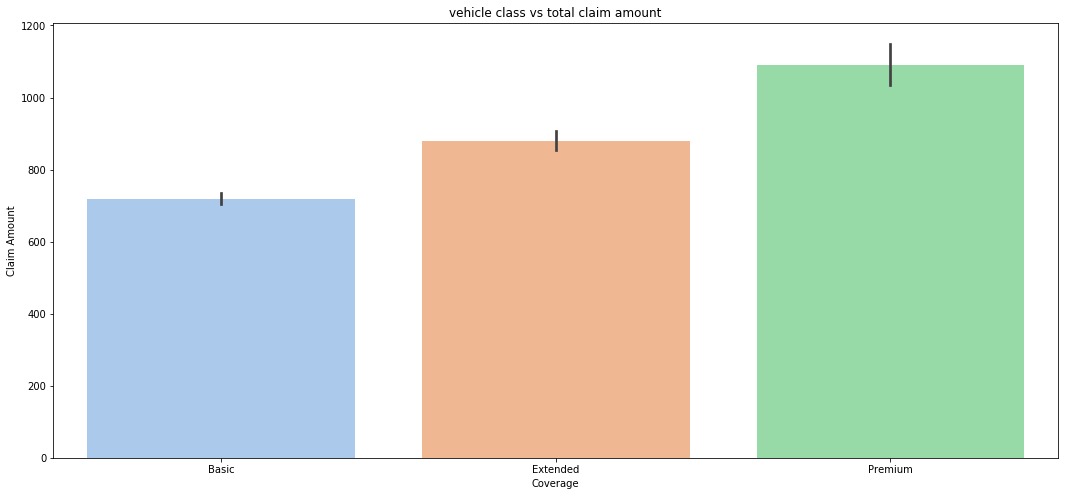

In [20]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Coverage', y = 'Claim Amount', data = df, palette ='pastel')

plt.title('vehicle class vs total claim amount')

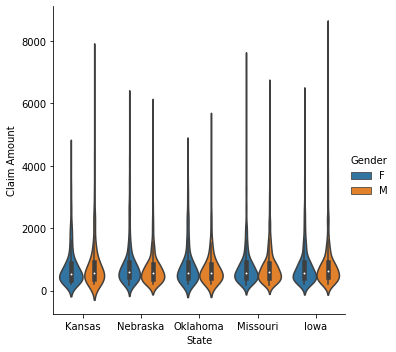

In [21]:
g=sns.catplot(x="State",y="Claim Amount",hue="Gender",data=df,kind="violin")
plt.show()

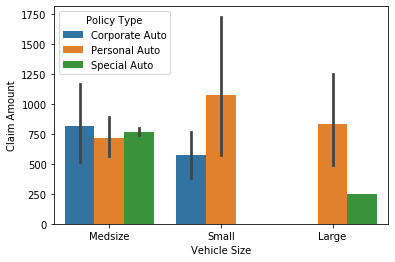

In [22]:
sns.barplot(x="Vehicle Size", y="Claim Amount", hue="Policy Type", data=df[:100])

In [23]:
pd.crosstab(df['Policy Type'],df['Claim Reason'])

Claim Reason,Collision,Hail,Other,Scratch/Dent
Policy Type,,,,
Corporate Auto,827,597,236,308
Personal Auto,2776,2201,744,1067
Special Auto,149,128,44,57


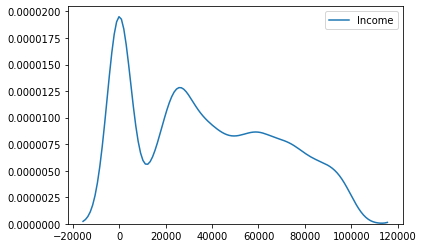

In [24]:
sns.kdeplot(df['Income'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2669f8b2f88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2669f8ac348>,
 'cmins': <matplotlib.collections.LineCollection at 0x2669f8bbfc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2669f8bbf48>}

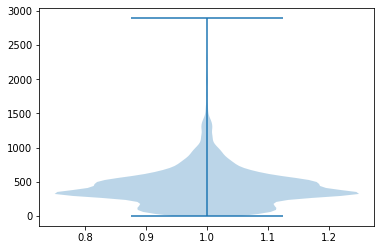

In [25]:
plt.violinplot(df['Total Claim Amount'])

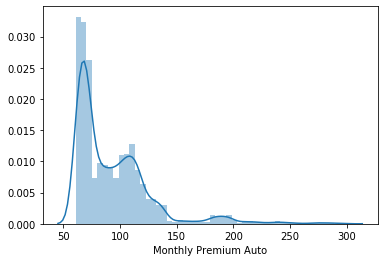

In [26]:
sns.distplot(df['Monthly Premium Auto'])

In [27]:
df.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [28]:
#lets encode our categorical variables and lets remove unncessary column with poor correlation
df_sc = df[['Total Claim Amount','Monthly Premium Auto','Months Since Policy Inception'
            ]].copy()
df_sc.head()


,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception
0,384.811147,69,5
1,1131.464935,94,42
2,566.472247,108,38
3,529.881344,106,65
4,138.130879,73,44


In [29]:
df_sc.corr()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception
Total Claim Amount,1.000000,0.632017,0.003335
Monthly Premium Auto,0.632017,1.000000,0.020257
Months Since Policy Inception,0.003335,0.020257,1.000000


In [30]:
df_sc.head()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception
0,384.811147,69,5
1,1131.464935,94,42
2,566.472247,108,38
3,529.881344,106,65
4,138.130879,73,44


In [31]:
#we can see income column has zero values present  but we can see with the correlation that income is a useless factor in determining autombile so need to replace the zero values

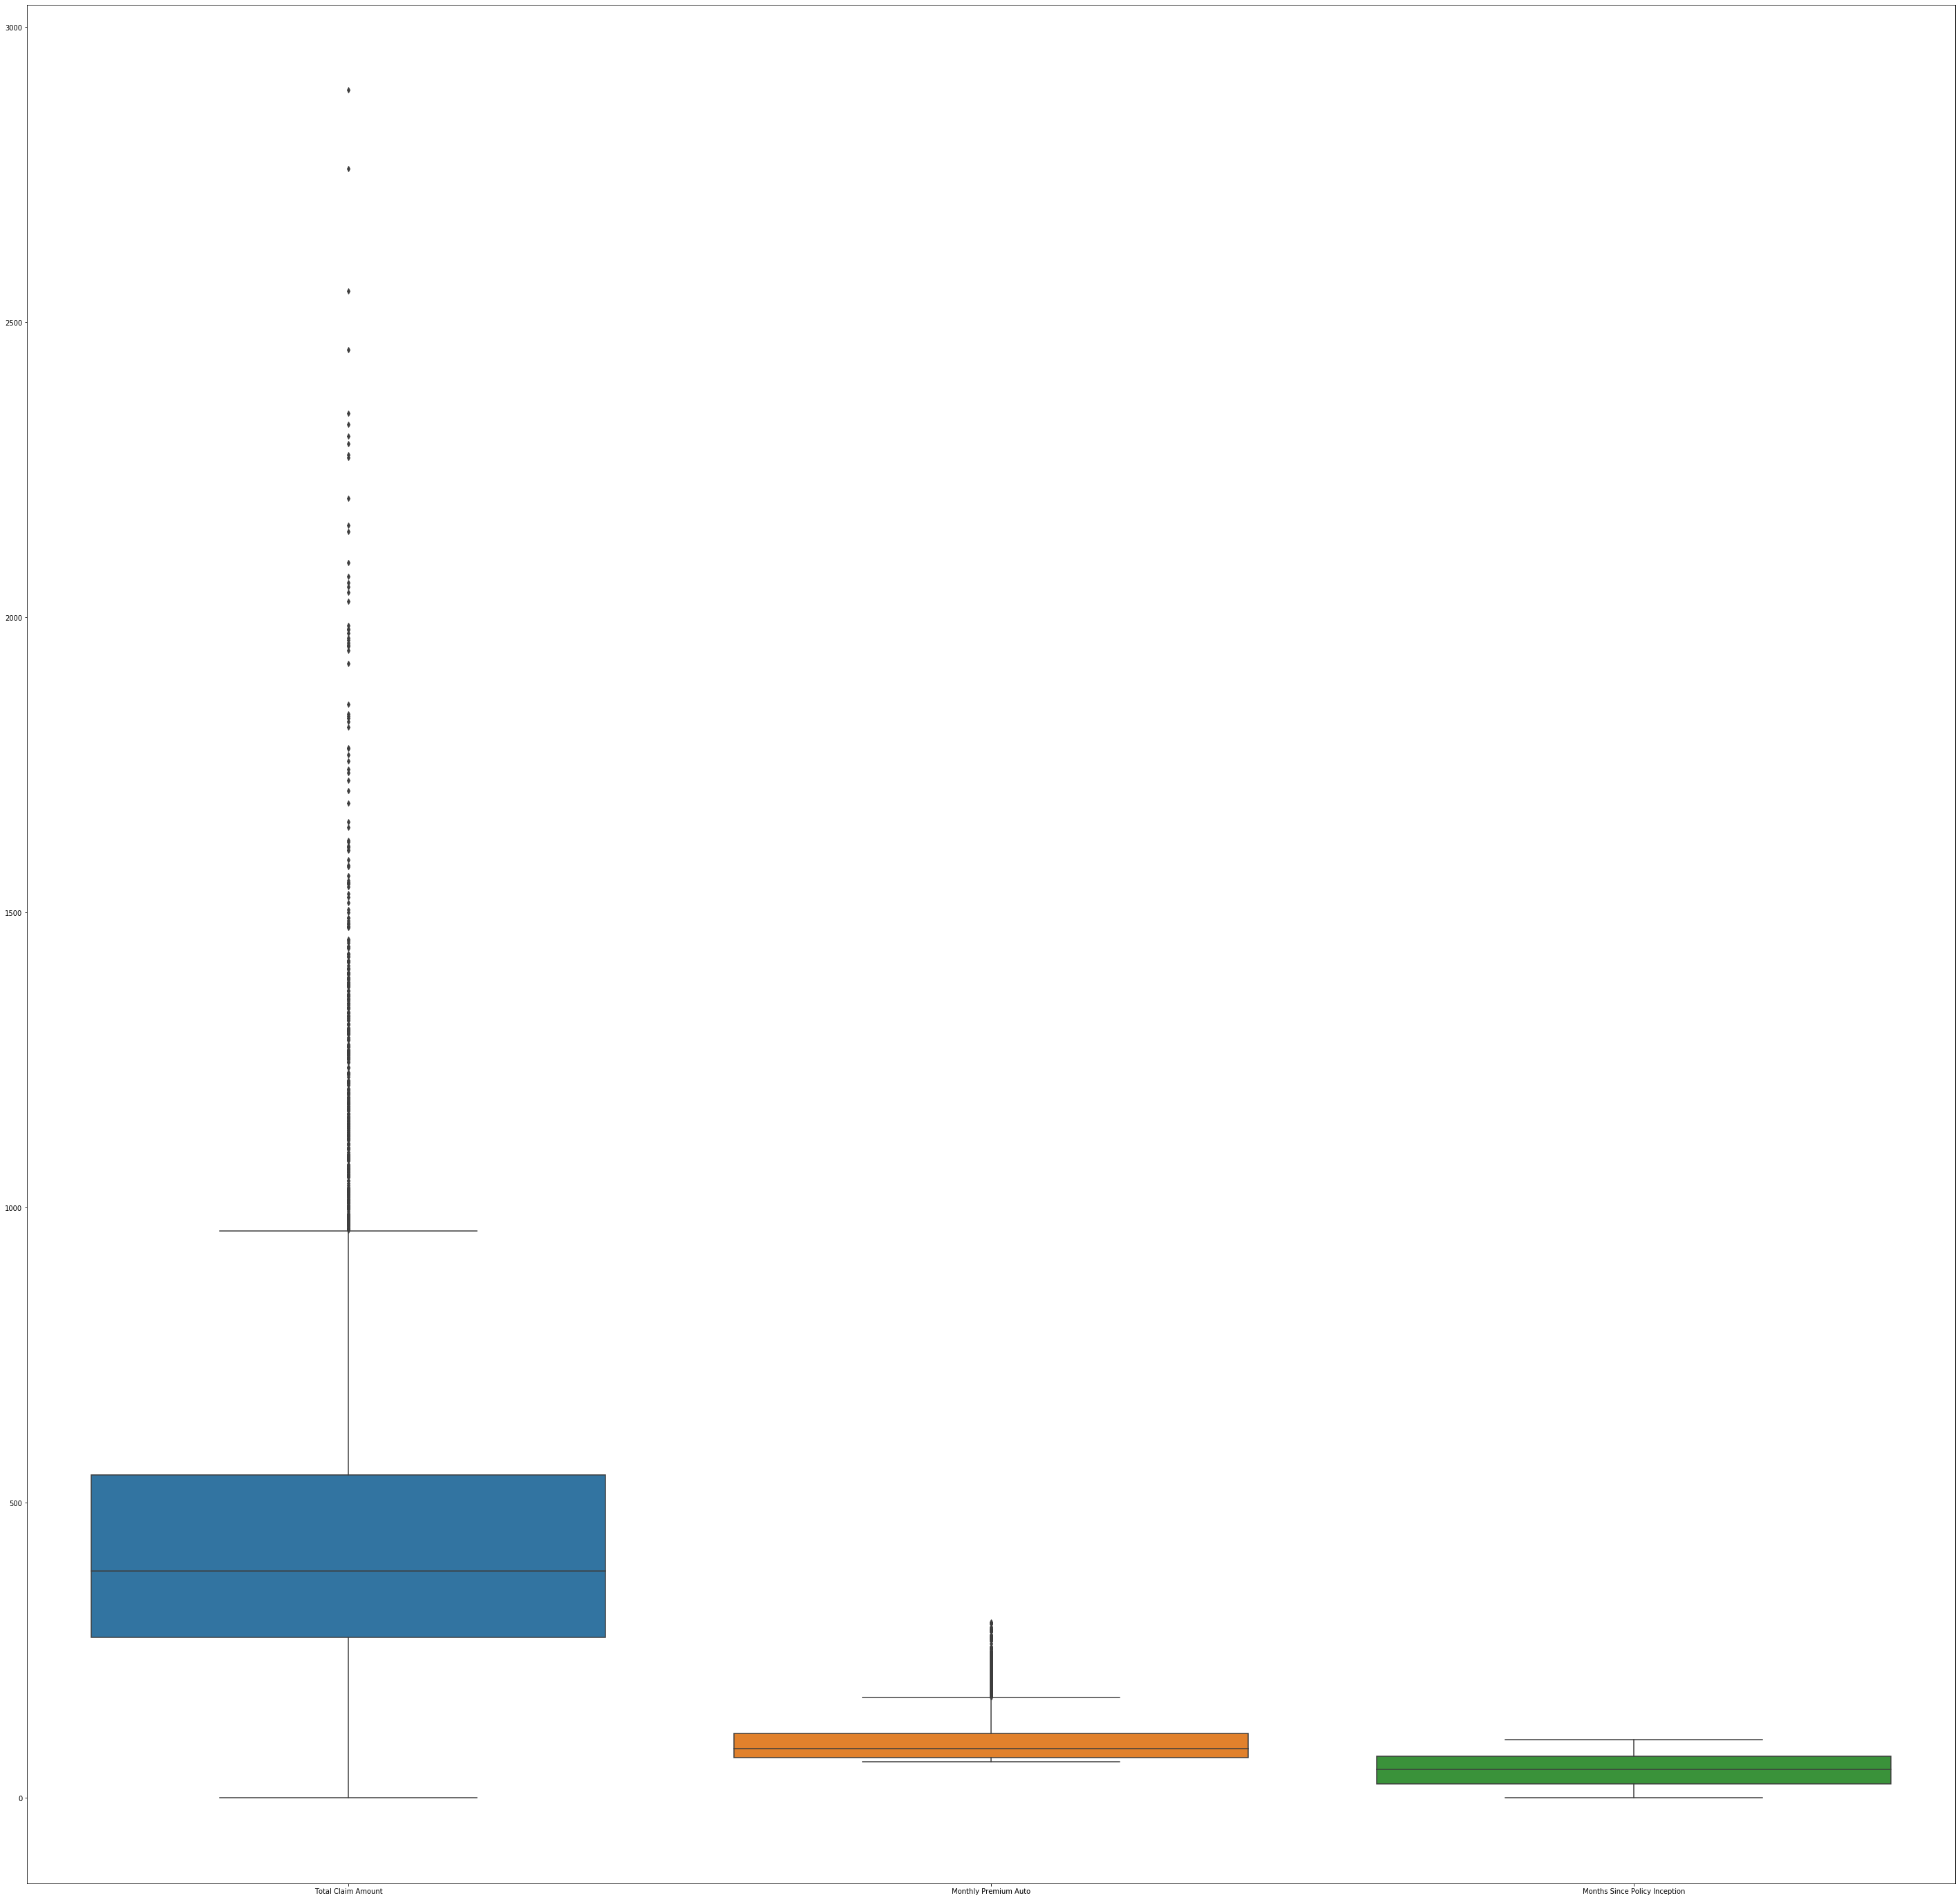

In [32]:

plt.figure(figsize = (50,50))
sns.boxplot(data=df_sc)
# outliers present in claim amount otherwise no major outliers present

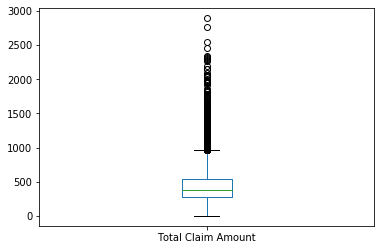

In [33]:
df['Total Claim Amount'].plot.box()

In [34]:
df.loc[df['Total Claim Amount']>1500,'']=np.mean(df['Total Claim Amount'])

In [35]:
# working on categorical data
df_cat = df[['Gender','Response','EmploymentStatus','Marital Status','Coverage','Policy Type','Policy','Claim Reason','Vehicle Class','Vehicle Size']].copy()
df_cat.head()

,Gender,Response,EmploymentStatus,Marital Status,Coverage,Policy Type,Policy,Claim Reason,Vehicle Class,Vehicle Size
0,F,No,Employed,Married,Basic,Corporate Auto,Corporate L3,Collision,Two-Door Car,Medsize
1,F,No,Unemployed,Single,Extended,Personal Auto,Personal L3,Scratch/Dent,Four-Door Car,Medsize
2,F,No,Employed,Married,Premium,Personal Auto,Personal L3,Collision,Two-Door Car,Medsize
3,M,No,Unemployed,Married,Basic,Corporate Auto,Corporate L2,Collision,SUV,Medsize
4,M,No,Employed,Single,Basic,Personal Auto,Personal L1,Collision,Four-Door Car,Medsize


In [36]:
Num_val = {'F':1, 'M':0}
df_cat['Gender'] = df_cat["Gender"].apply(lambda x: Num_val[x])
df_cat.head()

,Gender,Response,EmploymentStatus,Marital Status,Coverage,Policy Type,Policy,Claim Reason,Vehicle Class,Vehicle Size
0,1,No,Employed,Married,Basic,Corporate Auto,Corporate L3,Collision,Two-Door Car,Medsize
1,1,No,Unemployed,Single,Extended,Personal Auto,Personal L3,Scratch/Dent,Four-Door Car,Medsize
2,1,No,Employed,Married,Premium,Personal Auto,Personal L3,Collision,Two-Door Car,Medsize
3,0,No,Unemployed,Married,Basic,Corporate Auto,Corporate L2,Collision,SUV,Medsize
4,0,No,Employed,Single,Basic,Personal Auto,Personal L1,Collision,Four-Door Car,Medsize


In [37]:
Num_val = {'Yes':1, 'No':0}
df_cat['Response'] = df_cat["Response"].apply(lambda x: Num_val[x])
df_cat.head()

,Gender,Response,EmploymentStatus,Marital Status,Coverage,Policy Type,Policy,Claim Reason,Vehicle Class,Vehicle Size
0,1,0,Employed,Married,Basic,Corporate Auto,Corporate L3,Collision,Two-Door Car,Medsize
1,1,0,Unemployed,Single,Extended,Personal Auto,Personal L3,Scratch/Dent,Four-Door Car,Medsize
2,1,0,Employed,Married,Premium,Personal Auto,Personal L3,Collision,Two-Door Car,Medsize
3,0,0,Unemployed,Married,Basic,Corporate Auto,Corporate L2,Collision,SUV,Medsize
4,0,0,Employed,Single,Basic,Personal Auto,Personal L1,Collision,Four-Door Car,Medsize


In [38]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Gender,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [39]:
df_final = pd.concat([df_sc, df_cat], axis=1)
df_final.head()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Gender,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,384.811147,69,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1131.464935,94,42,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,566.472247,108,38,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,529.881344,106,65,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,138.130879,73,44,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [40]:
df_final.corr()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Gender,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Total Claim Amount,1.000000,0.632017,0.003335,-0.074564,0.016877,0.030123,-0.336091,0.029028,0.034293,0.332138,...,-0.015879,-0.286789,0.323061,0.325004,0.230744,0.101023,-0.146712,-0.009391,-0.074274,0.093198
Monthly Premium Auto,0.632017,1.000000,0.020257,-0.003918,0.010966,0.002847,-0.000246,-0.020773,-0.009342,0.012775,...,-0.009540,-0.464553,0.465811,0.499941,0.387442,0.197032,-0.241546,-0.017340,0.013996,-0.002812
Months Since Policy Inception,0.003335,0.020257,1.000000,-0.004198,0.002952,-0.004596,-0.012190,0.000612,0.002989,0.014259,...,-0.008929,-0.004336,0.018329,0.013408,-0.018470,0.018596,0.002551,0.000449,-0.006390,0.007047
Gender,-0.074564,-0.003918,-0.004198,1.000000,-0.004396,0.039860,0.014120,-0.006504,-0.020017,-0.023447,...,-0.002570,0.021666,-0.013439,-0.016887,0.003365,-0.004714,-0.017200,0.016226,-0.022054,0.012996
Response,0.016877,0.010966,0.002952,-0.004396,1.000000,0.021262,-0.038687,0.023761,0.295645,-0.096111,...,-0.150491,-0.023589,-0.026777,0.008122,0.024230,0.028869,-0.004693,0.033370,0.015105,-0.043237
EmploymentStatus_Disabled,0.030123,0.002847,-0.004596,0.039860,0.021262,1.000000,-0.277383,-0.047993,-0.038446,-0.125577,...,-0.009500,-0.016908,0.007121,-0.011957,0.009856,0.010778,0.007062,0.010568,-0.020770,0.015877
EmploymentStatus_Employed,-0.336091,-0.000246,-0.012190,0.014120,-0.038687,-0.277383,1.000000,-0.286924,-0.229847,-0.750760,...,0.030884,0.009634,0.014198,0.003566,-0.023534,-0.015063,0.013662,-0.026061,0.023036,-0.006540
EmploymentStatus_Medical Leave,0.029028,-0.020773,0.000612,-0.006504,0.023761,-0.047993,-0.286924,1.000000,-0.039768,-0.129897,...,-0.022310,0.012839,-0.026138,0.001092,-0.005117,-0.004354,-0.000255,0.008900,-0.014484,0.009891
EmploymentStatus_Retired,0.034293,-0.009342,0.002989,-0.020017,0.295645,-0.038446,-0.229847,-0.039768,1.000000,-0.104057,...,-0.036924,-0.002111,-0.024059,0.005943,0.005655,0.017114,-0.006611,0.007880,0.023094,-0.032807
EmploymentStatus_Unemployed,0.332138,0.012775,0.014259,-0.023447,-0.096111,-0.125577,-0.750760,-0.129897,-0.104057,1.000000,...,-0.004327,-0.008152,0.003140,-0.001209,0.021786,0.006992,-0.015800,0.016541,-0.017935,0.007987


In [41]:
#lets set up our feature and target variable
x = df_final.drop('Total Claim Amount', axis = 1)
y= df_final['Total Claim Amount']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=35)

In [43]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=37)
x = pca_new.fit_transform(x)

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)

print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(x_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))


Linear Regression - Train accuracy:  0.5557548578348583

Linear Regression - Test accuracy:  0.5631760709987153


In [45]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)    

max r2 score corresponding to  631  is  0.6135213205669778


In [46]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 272.3368047334486
Mean squared error: 272.3368047334486
Root Mean Squared error: 370.5277102371723


In [47]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [48]:
r2_score(tree_reg.predict(x_train),y_train)

0.9997633572966492

In [49]:
r2_score(tree_reg.predict(x_test),y_test)

0.27891665441728586

In [50]:
#lets select only most important feature variables as feature column to improve accuracy
df1_sc = df[['Total Claim Amount','Monthly Premium Auto','Months Since Policy Inception','Months Since Last Claim','Income'
            ]].copy()
df1_sc.head()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Months Since Last Claim,Income
0,384.811147,69,5,32,56274
1,1131.464935,94,42,13,0
2,566.472247,108,38,18,48767
3,529.881344,106,65,18,0
4,138.130879,73,44,12,43836


In [51]:
df1_cat = df[['Response','Coverage','Policy Type','Claim Reason','Vehicle Class','Vehicle Size','Gender','Marital Status','State','EmploymentStatus']].copy()
df1_cat.head()

,Response,Coverage,Policy Type,Claim Reason,Vehicle Class,Vehicle Size,Gender,Marital Status,State,EmploymentStatus
0,No,Basic,Corporate Auto,Collision,Two-Door Car,Medsize,F,Married,Kansas,Employed
1,No,Extended,Personal Auto,Scratch/Dent,Four-Door Car,Medsize,F,Single,Nebraska,Unemployed
2,No,Premium,Personal Auto,Collision,Two-Door Car,Medsize,F,Married,Oklahoma,Employed
3,No,Basic,Corporate Auto,Collision,SUV,Medsize,M,Married,Missouri,Unemployed
4,No,Basic,Personal Auto,Collision,Four-Door Car,Medsize,M,Single,Kansas,Employed


In [52]:
Num_val = {'F':1, 'M':0}
df1_cat['Gender'] = df1_cat["Gender"].apply(lambda x: Num_val[x])
df1_cat.head()

,Response,Coverage,Policy Type,Claim Reason,Vehicle Class,Vehicle Size,Gender,Marital Status,State,EmploymentStatus
0,No,Basic,Corporate Auto,Collision,Two-Door Car,Medsize,1,Married,Kansas,Employed
1,No,Extended,Personal Auto,Scratch/Dent,Four-Door Car,Medsize,1,Single,Nebraska,Unemployed
2,No,Premium,Personal Auto,Collision,Two-Door Car,Medsize,1,Married,Oklahoma,Employed
3,No,Basic,Corporate Auto,Collision,SUV,Medsize,0,Married,Missouri,Unemployed
4,No,Basic,Personal Auto,Collision,Four-Door Car,Medsize,0,Single,Kansas,Employed


In [53]:
Num_val = {'Yes':1, 'No':0}
df1_cat['Response'] = df1_cat["Response"].apply(lambda x: Num_val[x])
df1_cat.head()

,Response,Coverage,Policy Type,Claim Reason,Vehicle Class,Vehicle Size,Gender,Marital Status,State,EmploymentStatus
0,0,Basic,Corporate Auto,Collision,Two-Door Car,Medsize,1,Married,Kansas,Employed
1,0,Extended,Personal Auto,Scratch/Dent,Four-Door Car,Medsize,1,Single,Nebraska,Unemployed
2,0,Premium,Personal Auto,Collision,Two-Door Car,Medsize,1,Married,Oklahoma,Employed
3,0,Basic,Corporate Auto,Collision,SUV,Medsize,0,Married,Missouri,Unemployed
4,0,Basic,Personal Auto,Collision,Four-Door Car,Medsize,0,Single,Kansas,Employed


In [54]:
df1_cat = pd.get_dummies(df1_cat)
df1_cat.head()

,Response,Gender,Coverage_Basic,Coverage_Extended,Coverage_Premium,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Claim Reason_Collision,Claim Reason_Hail,...,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
df_final1 = pd.concat([df1_sc, df1_cat], axis=1)
df_final1.head()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Months Since Last Claim,Income,Response,Gender,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,384.811147,69,5,32,56274,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1131.464935,94,42,13,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,566.472247,108,38,18,48767,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,529.881344,106,65,18,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,138.130879,73,44,12,43836,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [56]:
x = df_final1.drop('Total Claim Amount', axis = 1)
y= df_final1['Total Claim Amount']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=35)

In [58]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=23)
x = pca_new.fit_transform(x)

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)

print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(x_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))


Linear Regression - Train accuracy:  0.5682257032859372

Linear Regression - Test accuracy:  0.5642155151137622


In [60]:
df_final1.corr()

,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Months Since Last Claim,Income,Response,Gender,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
Total Claim Amount,1.000000,0.632017,0.003335,0.007563,-0.355254,0.016877,-0.074564,-0.236817,0.104822,0.235561,...,-0.002338,0.002402,0.009318,-0.014383,0.005247,0.030123,-0.336091,0.029028,0.034293,0.332138
Monthly Premium Auto,0.632017,1.000000,0.020257,0.005026,-0.016665,0.010966,-0.003918,-0.401150,0.197219,0.367571,...,0.009988,-0.010683,0.005819,-0.018566,0.010069,0.002847,-0.000246,-0.020773,-0.009342,0.012775
Months Since Policy Inception,0.003335,0.020257,1.000000,-0.042959,-0.000875,0.002952,-0.004198,-0.006254,-0.001936,0.013747,...,0.003921,0.012914,-0.010809,-0.004856,0.005460,-0.004596,-0.012190,0.000612,0.002989,0.014259
Months Since Last Claim,0.007563,0.005026,-0.042959,1.000000,-0.026715,-0.016597,-0.025522,-0.015175,0.008087,0.012902,...,-0.012892,0.014303,-0.001042,0.000023,0.007671,-0.004345,-0.008183,0.015417,-0.012275,0.008524
Income,-0.355254,-0.016665,-0.000875,-0.026715,1.000000,0.011932,0.015138,0.020092,-0.027538,0.009845,...,-0.002079,0.004740,-0.002351,-0.003971,0.007665,-0.124878,0.793875,-0.127360,-0.100484,-0.722693
Response,0.016877,0.010966,0.002952,-0.016597,0.011932,1.000000,-0.004396,0.000420,-0.001812,0.002184,...,0.002447,-0.005838,0.003233,-0.000700,-0.002438,0.021262,-0.038687,0.023761,0.295645,-0.096111
Gender,-0.074564,-0.003918,-0.004198,-0.025522,0.015138,-0.004396,1.000000,-0.017271,0.016094,0.003662,...,0.003682,0.003917,-0.011234,0.003674,0.003865,0.039860,0.014120,-0.006504,-0.020017,-0.023447
Coverage_Basic,-0.236817,-0.401150,-0.006254,-0.015175,0.020092,0.000420,-0.017271,1.000000,-0.818416,-0.393479,...,0.005199,0.003614,-0.001988,0.004533,-0.014177,0.017570,-0.001134,0.011267,-0.002471,-0.011564
Coverage_Extended,0.104822,0.197219,-0.001936,0.008087,-0.027538,-0.001812,0.016094,-0.818416,1.000000,-0.206243,...,-0.006781,-0.003855,0.003206,0.001082,0.007461,-0.029682,-0.004696,-0.006397,0.021189,0.013968
Coverage_Premium,0.235561,0.367571,0.013747,0.012902,0.009845,0.002184,0.003662,-0.393479,-0.206243,1.000000,...,0.001996,0.000014,-0.001744,-0.009451,0.012204,0.017570,0.009443,-0.008951,-0.029693,-0.002654


In [61]:
#lets drop insignifaacant features to improve accuracy

In [62]:
df_final1.drop(['Months Since Policy Inception','Policy Type_Personal Auto','Policy Type_Special Auto','State_Iowa','State_Kansas'], axis = 1,inplace=True) 

In [63]:
x = df_final1.drop('Total Claim Amount', axis = 1)
y= df_final1['Total Claim Amount']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=35)

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)

print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(x_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))


Linear Regression - Train accuracy:  0.5668337952666658

Linear Regression - Test accuracy:  0.5692332030167224


In [66]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)    

max r2 score corresponding to  631  is  0.6239667865010541


In [87]:
pred=lr.predict(x_test)
print("Predicted automobile insurance claim:",pred)
print("actual automobile iinsurance claim",y_test)

Predicted automobile insurance claim: [430.20971066 267.540923   511.31897722 ... 359.10023462 713.51633996
 485.66862908]
actual automobile iinsurance claim 1136    302.791402
6544    113.724707
8749    585.058877
4033    220.038588
2844    432.480275
           ...    
3194    564.922034
1554    171.382890
9116    331.200000
4984    161.537767
2889    344.765129
Name: Total Claim Amount, Length: 2010, dtype: float64


In [67]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 265.1257890062108
Mean squared error: 265.1257890062108
Root Mean Squared error: 360.7990375025954


In [68]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.5655074098296463


In [69]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [70]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 5.44654854e+00 -3.97609830e-02 -1.68747695e-03  1.59607615e+01
 -3.44283971e+01  6.69403170e+00 -1.12929739e+01  4.59894220e+00
 -3.92181807e+00 -1.40001725e+01  1.36629731e+01  1.08402666e+00
 -7.46827313e-01  3.55225260e+00  4.20722534e+01 -3.12797156e+00
 -1.16800914e+01 -3.64832236e+01  5.66678057e+00 -1.42543363e+01
 -2.75103815e+01  4.17647179e+01 -2.25653516e+01 -3.60269188e+01
  5.85922704e+01  3.80076498e+00  2.56028245e+00 -4.73586199e-02
 -2.95466705e+00 -6.25711210e+01  7.32277303e+00  1.21151706e+01
  4.60878444e+01]
0.5719384619702492


In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [73]:
r2_score(tree_reg.predict(x_train),y_train)

1.0

In [74]:
r2_score(tree_reg.predict(x_test),y_test)

0.31586746993802894

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [77]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [78]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  188.42827918166253 
Standard Deviation: 6.734377812312905


In [79]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None, n_estimators=30)
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
r2_score(forest_reg.predict(x_train),y_train)

0.9274954767141654

In [81]:
r2_score(forest_reg.predict(x_test),y_test)

0.9267220132075903

In [82]:
knn = KNeighborsRegressor(n_neighbors=3)

In [83]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [84]:
knn_reg.score(x_train,y_train)

0.6241982769705527

In [88]:
knn_reg.score(x_test,y_test)

0.43428435612122945

In [89]:
#TILL NOW RANDOM FOREST REGRESSOR WORKS BEST WITH 92 ACCURACY
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_regautof.obj')
forest_regautof_from_joblib=joblib.load('forest_regautof.obj')